In [1]:
import math
import pandas as pd
from utilities_database import retrieve_data, prepare_database, consult_database
from plots import gaussian
from cdf import norm_cdf

Database *input.db* found in: c:\Codebase\Python_Eiit_RyR\a2_Analyser\a7_hyphotesis_testing\database\input.db
Database *output.db* found in: c:\Codebase\Python_Eiit_RyR\a2_Analyser\a7_hyphotesis_testing\database\output.db


In [2]:
data = pd.read_csv(("../a1_input/jobs_in_data.csv"))
prepare_database("input.db", data, "table")

Dataframe stored as *table*


'table'

In [3]:
consult_database("input.db")

['table']

In [4]:
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


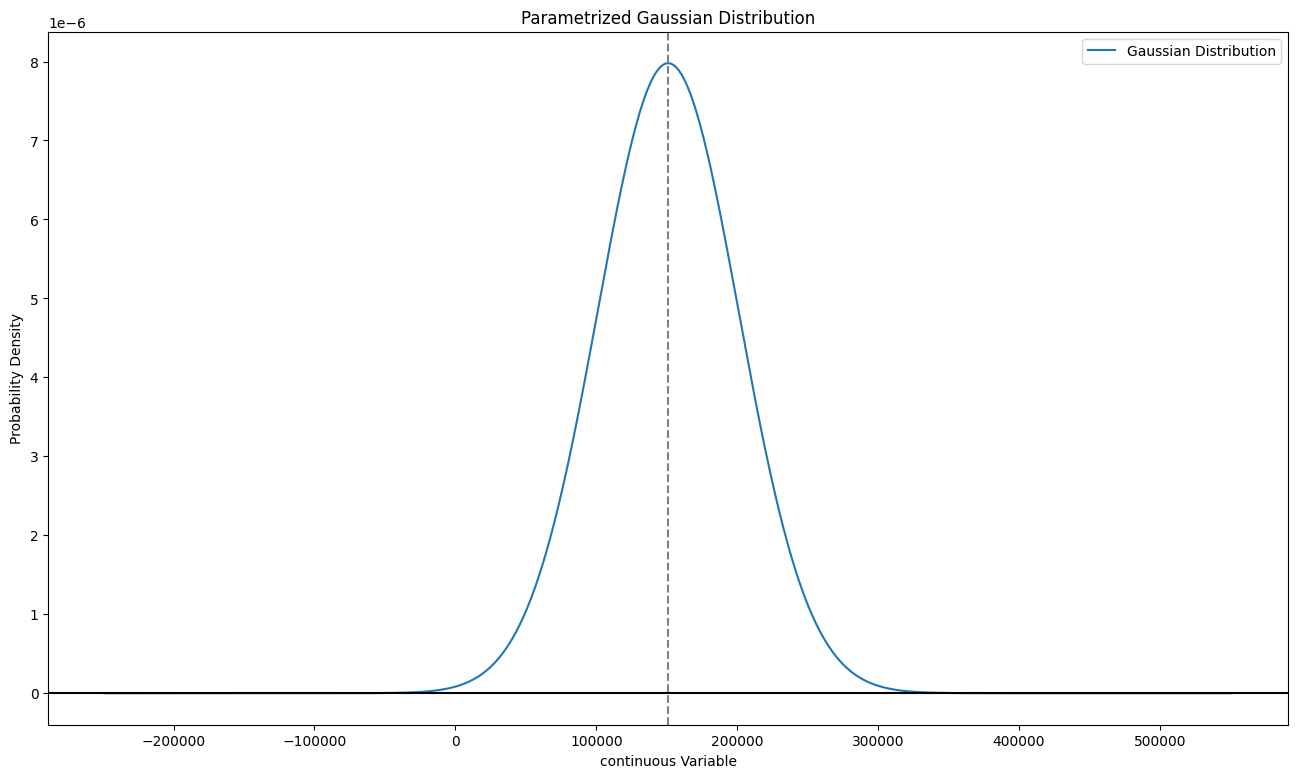

In [5]:
pop_mean = 151000
pop_std = 50000
fig = gaussian(pop_mean, pop_std)

In [6]:
sample_data = data.loc[:, "salary_in_usd"]
# Calculate the sample mean
sample_mean = sum(sample_data) / len(sample_data)
print("Sample mean: ", round(sample_mean, 3))
# Calculate the sample standard deviation
sample_std_dev = (sum((x - sample_mean) ** 2 for x in sample_data) / (len(sample_data) - 1)) ** 0.5
print("Sample standard deviation: ", round(sample_std_dev, 4))

Sample mean:  150299.496
Sample standard deviation:  63177.372


In [7]:
alpha = 0.05 

In [13]:
z_score = (sample_mean - pop_mean) / (pop_std / (len(sample_data) ** 0.5))
print("Test statistic:", z_score)

p_val = norm_cdf(z_score)
print("p-Value:", p_val)

Test statistic: -1.3550732792633735
p-Value: 0.08769710553193683


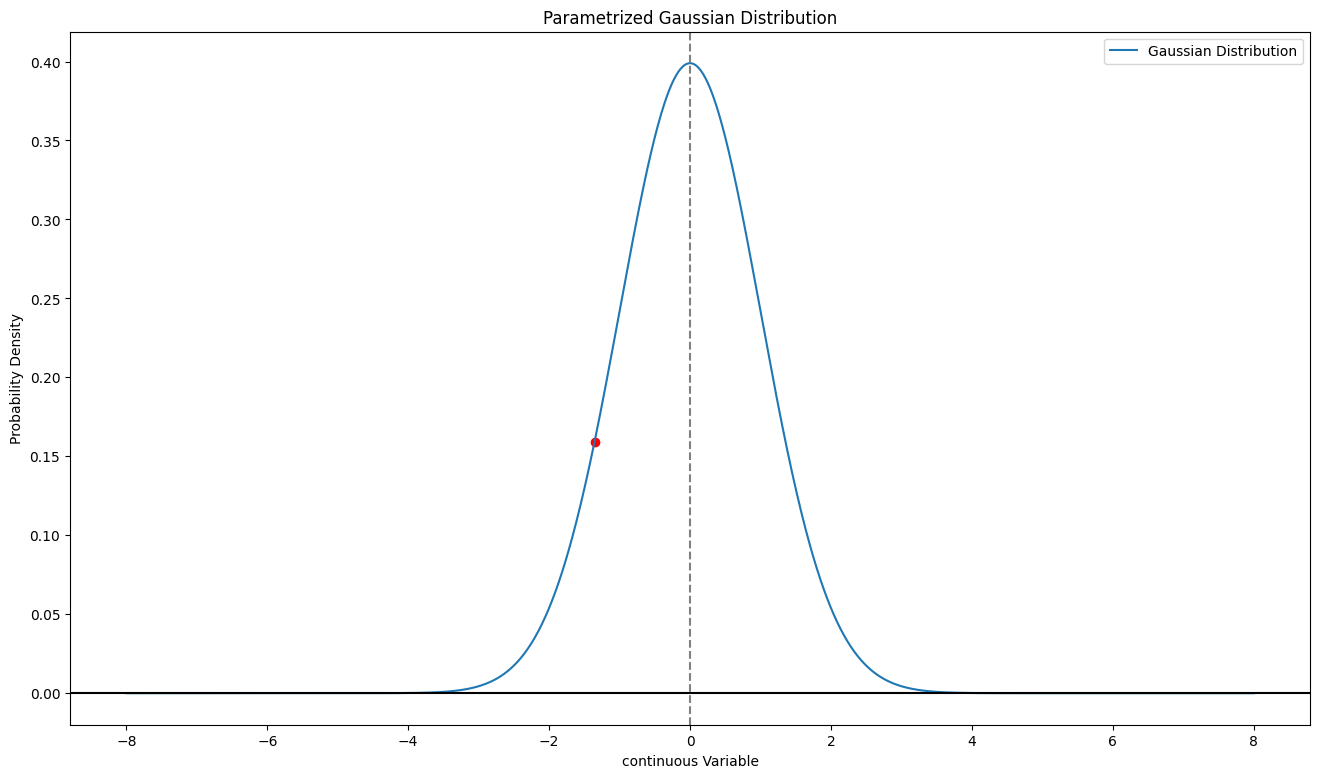

In [10]:
fig = gaussian(0, 1, z_score)